In [4]:
import torch
import aux_functions as aux
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('..')
from env import ROOT_DIR as root

%load_ext autoreload
%autoreload 2


In [2]:
config = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),

    # Define your model names here
    'vae_prefix': 'StandardVAE',
    'eavae_prefix': 'EAVAE_softlaplace',

    # whether to use posterior mean or sample for the scaling var
    # sample should be chosen for softlaplace prior
    'scaling_first_moment': 'sample', # 'mean' or 'sample'

    # whether to use mean of the reconstructionsss
    'use_mean': True,

    'savedir': os.path.join(root, 'figures/'),
}


path = '../eval_data/'

In [3]:
cmap_bright_vae_eavae = sns.color_palette(['#4477AA','#EE6677'],2)
cmap_pale_vae_eavae = sns.color_palette(['#BBCCEE','#FFCCCC'],2)
cmap_dark_vae_eavae = sns.color_palette(['#222255','#663333'],2)

color_vae = cmap_bright_vae_eavae[0]
color_vae_pale = cmap_pale_vae_eavae[0]
color_eavae = cmap_bright_vae_eavae[1]
color_eavae_pale = cmap_pale_vae_eavae[1]


# Figure 1

## Panels 1b, c, d

In [4]:
nat_contrast = aux.load(config['eavae_prefix'], 'contrast')
vae_post_mean = aux.get_active_dims(([config['vae_prefix'], 'posterior_mean']))
vae_post_std = aux.get_active_dims(([config['vae_prefix'], 'posterior_std']))
eavae_post_mean = aux.get_active_dims(([config['eavae_prefix'], 'posterior_mean']))
eavae_post_std = aux.get_active_dims(([config['eavae_prefix'], 'posterior_std']))
s_post_mean = aux.load(config['eavae_prefix'], f"posterior_{config['scaling_first_moment']}")[:, -1]

File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_contrast.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
['StandardVAE', 'posterior_mean'] # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_std.pt
['StandardVAE', 'posterior_std'] # of active dims:  1256
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_mean.pt
['EAVAE_softlaplace', 'posterior_mean'] # of active dims:  1256
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_mean.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_std.pt
['EAVAE_softlaplace', 'posterior_std'] # of active dims:  1256
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample.pt


In [5]:
contrast_rounds_test_vae = aux.load(config['vae_prefix'], 'contrast_rounds')
binned_signal_mean_test_vae = aux.load(config['vae_prefix'], 'binned_signal_mean')
binned_signal_mean_error_test_vae = aux.load(config['eavae_prefix'], 'binned_signal_mean_error')
binned_signal_var_test_vae = aux.load(config['vae_prefix'], 'binned_signal_var')
binned_signal_var_error_test_vae = aux.load(config['eavae_prefix'], 'binned_signal_var_error')
binned_noise_var_test_vae = aux.load(config['vae_prefix'], 'binned_noise_var')
binned_noise_var_error_test_vae = aux.load(config['eavae_prefix'], 'binned_noise_var_error')

contrast_rounds_test_eavae = aux.load(config['eavae_prefix'], 'contrast_rounds')
binned_signal_mean_test_eavae = aux.load(config['eavae_prefix'], 'binned_signal_mean')
binned_signal_mean_error_test_eavae = aux.load(config['eavae_prefix'], 'binned_signal_mean_error')
binned_signal_var_test_eavae = aux.load(config['eavae_prefix'], 'binned_signal_var')
binned_signal_var_error_test_eavae = aux.load(config['eavae_prefix'], 'binned_signal_var_error')
binned_noise_var_test_eavae = aux.load(config['eavae_prefix'], 'binned_noise_var')
binned_noise_var_error_test_eavae = aux.load(config['eavae_prefix'], 'binned_noise_var_error')

File loaded from ../eval_data/StandardVAE/StandardVAE_contrast_rounds.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_binned_signal_mean.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_signal_mean_error.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_binned_signal_var.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_signal_var_error.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_binned_noise_var.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_noise_var_error.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_contrast_rounds.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_signal_mean.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_signal_mean_error.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_binned_signal_var.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_bin

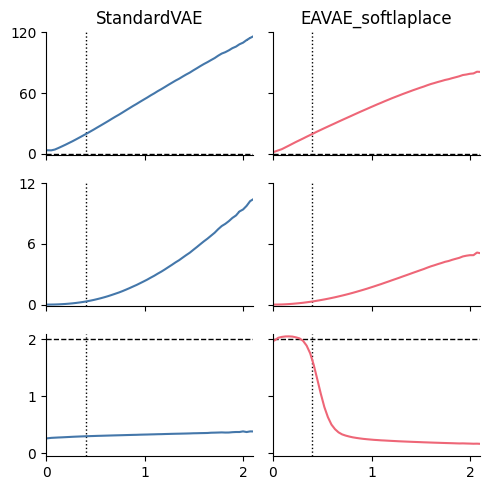

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(5,5))
ax[0,0].errorbar(x=contrast_rounds_test_vae[:-1],y=binned_signal_mean_test_vae[:-1],yerr=binned_signal_mean_error_test_vae[:-1],ms=2,fmt='-',ecolor='gray',color=color_vae)#,label='test imgs')
ax[1,0].errorbar(x=contrast_rounds_test_vae[:-1],y=binned_signal_var_test_vae[:-1],yerr=binned_signal_var_error_test_vae[:-1],ms=2,fmt='-',ecolor='gray',color=color_vae)#,label='test imgs')
ax[2,0].errorbar(x=contrast_rounds_test_vae[:-1],y=binned_noise_var_test_vae[:-1],yerr=binned_noise_var_error_test_vae[:-1],ms=2,fmt='-',ecolor='gray',color=color_vae,zorder=1)#,label='VAE')#,label='test imgs')
ax[0,1].errorbar(x=contrast_rounds_test_eavae[:-1],y=binned_signal_mean_test_eavae[:-1],yerr=binned_signal_mean_error_test_eavae[:-1],ms=2,fmt='-',ecolor='gray',color=color_eavae)#,label='test imgs')
ax[1,1].errorbar(x=contrast_rounds_test_eavae[:-1],y=binned_signal_var_test_eavae[:-1],yerr=binned_signal_var_error_test_eavae[:-1],ms=2,fmt='-',ecolor='gray',color=color_eavae)#,label='test imgs')
ax[2,1].errorbar(x=contrast_rounds_test_eavae[:-1],y=binned_noise_var_test_eavae[:-1],yerr=binned_noise_var_error_test_eavae[:-1],ms=2,fmt='',ecolor='gray',color=color_eavae,zorder=1)

ax[0,0].set_title(config['vae_prefix'])
ax[0,1].set_title(config['eavae_prefix'])

# Setting xlim and xticks
for i in range(3):
    ax[i,0].set_xlim(0,2.1)
    ax[i,1].set_xlim(0,2.1)
for i in range(2):
    ax[i,0].set_xticks([0,1,2],['','',''])
    ax[i,1].set_xticks([0,1,2], ['','',''])
ax[2,0].set_xticks([0,1,2])
ax[2,1].set_xticks([0,1,2])

# Setting ylim and axhlines
for j in range(2):
    ax[0,j].axhline(0,color='black',ls='--',zorder= 0,lw=1)
    ax[0,j].set_ylim(-1,120)
    ax[1,j].set_ylim(-0.1,12)
    ax[2,j].set_ylim(-0.05,2.1)
    ax[2,j].axhline(2,color='black',ls='--',zorder= 0,lw=1,label='prior')

# Setting yticks
ax[0,0].set_yticks([0,60,120])
ax[0,1].set_yticks([0,60,120],['','',''])
ax[1,0].set_yticks([0,6,12])
ax[1,1].set_yticks([0,6,12],['','',''])
ax[2,0].set_yticks([0,1,2])
ax[2,1].set_yticks([0,1,2],['','',''])

for a in ax.flat:
    a.spines[['right', 'top']].set_visible(False)
    a.axvline(0.4, color='black', ls=':', lw=1, zorder=0)

fig.tight_layout()

aux.save_fig(config['savedir']+"vae_eavae_moments")

## Panel 1f

In [7]:
vae_rec = aux.load(config['vae_prefix'], 'reconstruction')
eavae_rec = aux.load(config['eavae_prefix'], 'reconstruction')

ind = 2 if config['use_mean'] else 1
print(f'With use_mean = {config["use_mean"]}')
x_ori, x_vae = vae_rec[0], vae_rec[ind]
x_eavae = eavae_rec[ind]

contrasts = torch.std(x_ori, dim=(1,2,3))
contrasts_sorted, contrasts_sorted_idx = torch.sort(contrasts)

File loaded from ../eval_data/StandardVAE/StandardVAE_reconstruction.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_reconstruction.pt
With use_mean = True


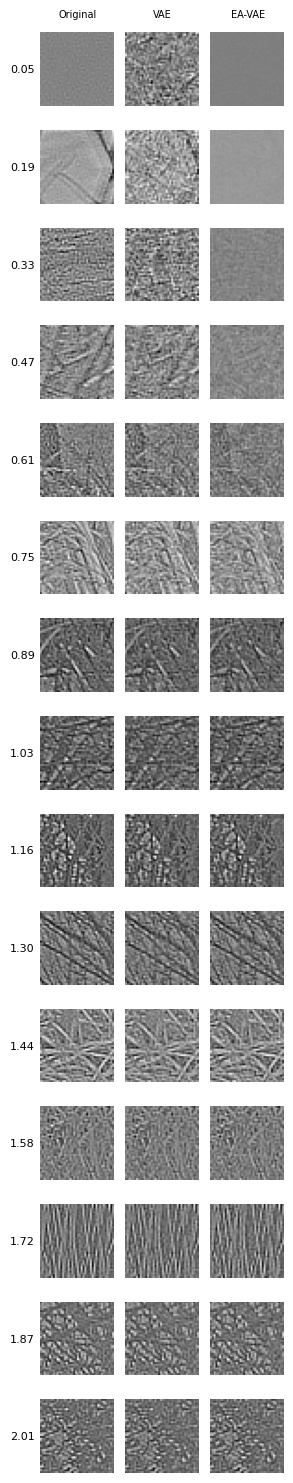

In [8]:
num_images = 15
min_contrast, max_contrast = 0.05, 2

fig, ax = plt.subplots(num_images, 3, figsize=(3, num_images))
values = torch.linspace(min_contrast, max_contrast, num_images)

ax[0,0].text(20, -10, 'Original', fontsize=7, horizontalalignment='center', verticalalignment='center')
ax[0,1].text(20, -10, 'VAE', fontsize=7, horizontalalignment='center', verticalalignment='center')
ax[0,2].text(20, -10, 'EA-VAE', fontsize=7, horizontalalignment='center', verticalalignment='center')

for k in range(num_images):
    threshold = values[k]
    ratio = torch.where(contrasts_sorted > threshold)[0][0].item()
    ind = contrasts_sorted_idx[ratio]
    vminn = np.array([x_ori[ind].min(),x_vae[ind].min(),x_eavae[ind].min()]).min()
    vmaxx = np.array([x_ori[ind].max(),x_vae[ind].max(),x_eavae[ind].max()]).max()
    ax[k,0].imshow(x_ori[ind].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[k,0].axis("off")
    ax[k,0].set_aspect("equal")
    ax[k,0].text(-10, 20, f'{x_ori[ind].std():.2f}', horizontalalignment='center', verticalalignment='center', fontsize=8)
    ax[k,1].imshow(x_vae[ind].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[k,1].axis("off")
    ax[k,1].set_aspect("equal")
    ax[k,2].imshow(x_eavae[ind].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[k,2].axis("off")
    ax[k,2].set_aspect("equal")

fig.tight_layout()

aux.save_fig(config['savedir']+"vae_eavae_reconstruction")

/tmp/ipykernel_1457493/1217242665.py:33: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


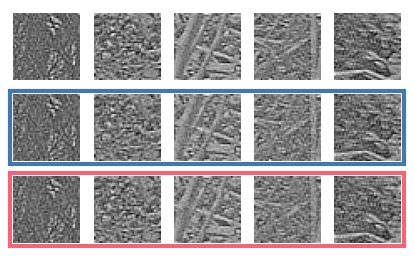

In [9]:
hi_contrast_idx = np.where(x_ori.std(dim=(1,2,3)) > 0.75)
x_ori_hi = x_ori[hi_contrast_idx]
x_vae_hi = x_vae[hi_contrast_idx]
x_eavae_hi = x_eavae[hi_contrast_idx]

fig, ax = plt.subplots(3, 5, figsize=(5,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_eavae, facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_vae, facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i,k in enumerate(range(6,11)):

    vminn = np.array([x_ori_hi[k].min(),x_vae_hi[k].min(),x_eavae_hi[k].min()]).min()
    vmaxx = np.array([x_ori_hi[k].max(),x_vae_hi[k].max(),x_eavae_hi[k].max()]).max()
    ax[0, i].imshow(x_ori_hi[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_vae_hi[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_eavae_hi[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

aux.save_fig(config['savedir']+"vae_eavae_reconstruction_fig1")

## Panel 1g

In [10]:
informative_idxs_vae = aux.get_active_dims([config['vae_prefix'], 'posterior_mean'], only_mask=True)
informative_idxs_eavae = aux.get_active_dims([config['eavae_prefix'], 'posterior_mean'], only_mask=True)

vae_pf = torch.tensor(aux.load(config['vae_prefix'], 'projective_fields'))
eavae_pf = torch.tensor(aux.load(config['eavae_prefix'], 'projective_fields'))

vae_pf_active = vae_pf[informative_idxs_vae]
eavae_pf_active = eavae_pf[informative_idxs_eavae]
# passive dimensions (not in informative_idxs)
vae_pf_passive = vae_pf[~informative_idxs_vae]
eavae_pf_passive = eavae_pf[~informative_idxs_eavae]

File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
['StandardVAE', 'posterior_mean'] # of active dims:  1256
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_mean.pt
['EAVAE_softlaplace', 'posterior_mean'] # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_projective_fields.pt


/tmp/ipykernel_1457493/1948000001.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  vae_pf = torch.tensor(aux.load(config['vae_prefix'], 'projective_fields'))


File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_projective_fields.pt


/tmp/ipykernel_1457493/1065725004.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


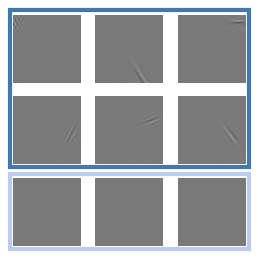

In [11]:
nrows,ncols= 3,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
rect_vae_inf = plt.Rectangle((-2.5,-0.05), width=140.5, height=2.325,
                     transform=axs[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_vae, facecolor="none", linewidth=3)
rect_vae_dec = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=axs[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_vae_pale, facecolor="none", linewidth=3)
axs[1,0].add_patch(rect_vae_inf)
axs[2,0].add_patch(rect_vae_dec)
for ind,ax in enumerate(axs.ravel()):
    if ind < 2*ncols:
        ind = np.random.randint(0,1256)
        img = vae_pf_active[ind, :]
    else:
        img = vae_pf_passive[ind, :]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=eavae_pf.min(),vmax = eavae_pf.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

aux.save_fig(config['savedir']+"vae_projective_fields_fig1")

/tmp/ipykernel_1457493/453688037.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


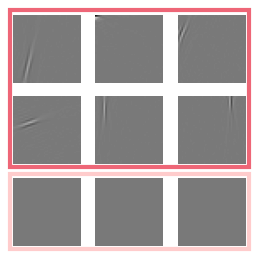

In [12]:
nrows,ncols= 3,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
rect_eavae_inf = plt.Rectangle((-2.5,-0.05), width=140.5, height=2.325,
                     transform=axs[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_eavae, facecolor="none", linewidth=3)
rect_eavae_dec = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=axs[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=color_eavae_pale, facecolor="none", linewidth=3)
axs[1,0].add_patch(rect_eavae_inf)
axs[2,0].add_patch(rect_eavae_dec)
for ind,ax in enumerate(axs.ravel()):
    if ind < 2*ncols:
        ind = np.random.randint(0,1256)
        img = eavae_pf_active[ind, :]
    else:
        img = eavae_pf_passive[ind, :]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=eavae_pf.min(),vmax = eavae_pf.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

aux.save_fig(config['savedir']+"eavae_projective_fields_fig1")

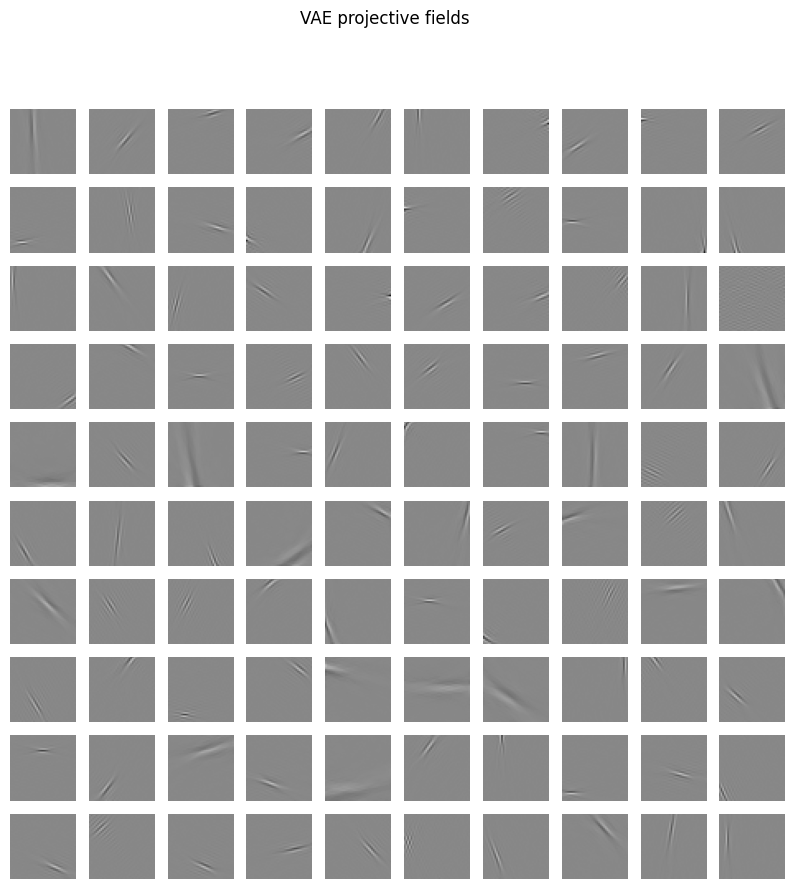

In [13]:
# present nrows x ncols random RFs

model_pf_active = vae_pf_active

nrows,ncols= 10,10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
for ind,ax in enumerate(axs.ravel()):
    img = model_pf_active[ind]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=model_pf_active.min(),vmax = model_pf_active.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('VAE projective fields')

aux.save_fig(config['savedir']+"vae_projective_fields")

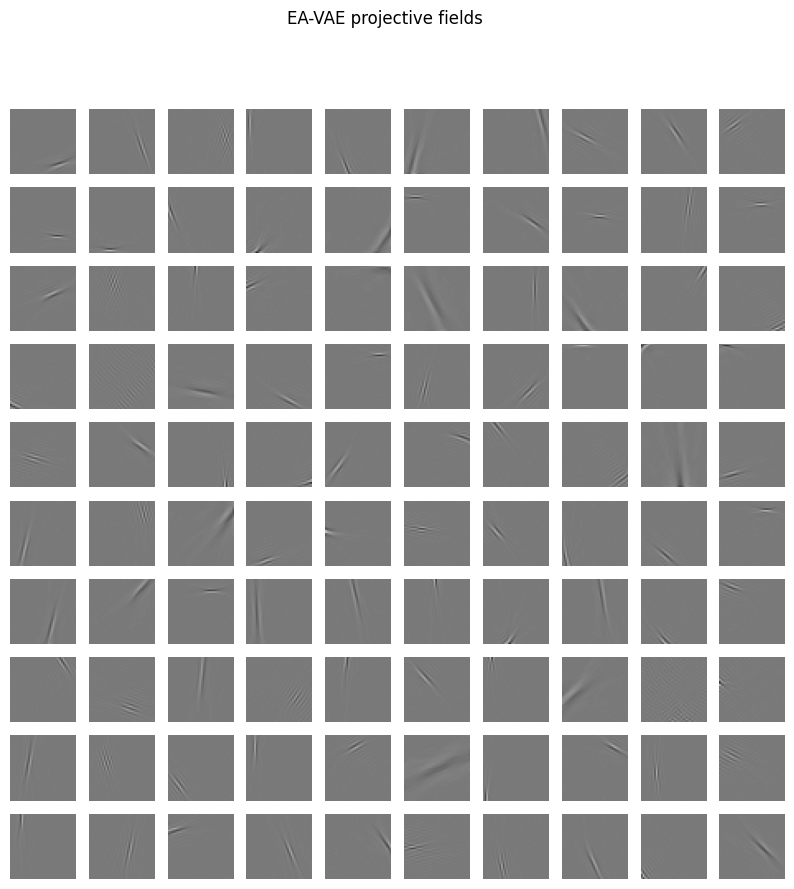

In [14]:
# present nrows x ncols random RFs

model_pf_active = eavae_pf_active

nrows,ncols= 10,10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
for ind,ax in enumerate(axs.ravel()):
    img = model_pf_active[ind]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=model_pf_active.min(),vmax = model_pf_active.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('EA-VAE projective fields')

aux.save_fig(config['savedir']+"eavae_projective_fields")

## Panel 1h

In [15]:
nat_contrast = aux.load(config['eavae_prefix'], 'contrast')
s_post_mean = aux.load(config['eavae_prefix'], f"posterior_{config['scaling_first_moment']}")[:, -1]
s_post_std = aux.load(config['eavae_prefix'], f"posterior_std")[:, -1]
s_post_sample = aux.load(config['eavae_prefix'], f"posterior_sample")[:, -1]

File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_contrast.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_std.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample.pt


/tmp/ipykernel_1457493/321544141.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0].scatter(nat_contrast[:5000], s_post_sample[:5000], s=1, c=color_eavae)
/tmp/ipykernel_1457493/321544141.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(nat_contrast[:5000], s_post_std[:5000], s=1, c=color_eavae)


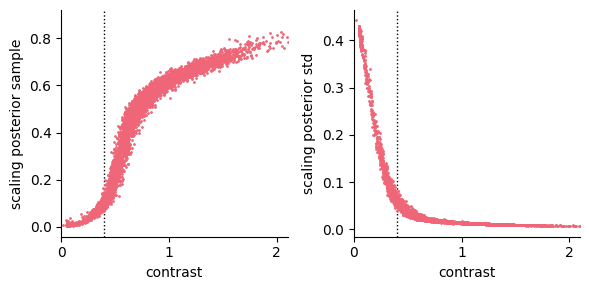

In [16]:
# eavae scaling posterior over contrast of images

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].scatter(nat_contrast[:5000], s_post_sample[:5000], s=1, c=color_eavae)
axs[0].set_xlabel('contrast')
axs[0].set_ylabel('scaling posterior sample')
axs[0].spines[['right', 'top']].set_visible(False)

axs[1].scatter(nat_contrast[:5000], s_post_std[:5000], s=1, c=color_eavae)
axs[1].set_xlabel('contrast')
axs[1].set_ylabel('scaling posterior std')
axs[1].spines[['right', 'top']].set_visible(False)

# add dotted vertical line to both plots at x=0.4
for ax in axs:
    # axvline to background
    ax.axvline(0.4, color='black', linestyle='dotted', linewidth=1, zorder=0)
    ax.set_xlim(0, 2.1)
    ax.set_xticks([0, 1, 2])

plt.tight_layout()

aux.save_fig(config['savedir']+"eavae_scaling_posterior_5000pts")

# Figure 5

In [17]:
# see divisivenorm/figures_divisivenorm.ipynb

# Supplementary 2

In [18]:
vae = config['vae_prefix']
eavae = config['eavae_prefix']

natural_posterior_std = aux.get_active_dims((vae, 'posterior_std'))[:60000].mean(dim=1)
natural_shuffled_posterior_std = aux.get_active_dims((vae, 'posterior_std_shuffled_natural'))[:60000].mean(dim=1)
mnist_posterior_std = aux.get_active_dims((vae, 'posterior_std_mnist'))[:60000].mean(dim=1)
fashion_posterior_std = aux.get_active_dims((vae, 'posterior_std_fashion'))[:60000].mean(dim=1)
chest_posterior_std = aux.get_active_dims((vae, 'posterior_std_chest'))[:60000].mean(dim=1)

natural_posterior_std_ea = aux.get_active_dims((eavae, 'posterior_std'))[:60000].mean(dim=1)
natural_shuffled_posterior_std_ea = aux.get_active_dims((eavae, 'posterior_std_shuffled_natural'))[:60000].mean(dim=1)
mnist_posterior_std_ea = aux.get_active_dims((eavae, 'posterior_std_mnist'))[:60000].mean(dim=1)
fashion_posterior_std_ea = aux.get_active_dims((eavae, 'posterior_std_fashion'))[:60000].mean(dim=1)
chest_posterior_std_ea = aux.get_active_dims((eavae, 'posterior_std_chest'))[:60000].mean(dim=1)


File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_std.pt
('StandardVAE', 'posterior_std') # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_std_shuffled_natural.pt
('StandardVAE', 'posterior_std_shuffled_natural') # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_std_mnist.pt
('StandardVAE', 'posterior_std_mnist') # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_std_fashion.pt
('StandardVAE', 'posterior_std_fashion') # of active dims:  1256
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_mean.pt
File loaded from ../eval_data/StandardVAE/StandardVAE_posterior_st

In [19]:
import pandas as pd

datasets = ['natural', 'natural_shuffled', 'mnist', 'fashion', 'chest']
models = ['vae', 'eavae']

uncertainty_data = {
    'natural': [natural_posterior_std, natural_posterior_std_ea],
    'natural_shuffled': [natural_shuffled_posterior_std, natural_shuffled_posterior_std_ea],
    'mnist': [mnist_posterior_std, mnist_posterior_std_ea],
    'fashion': [fashion_posterior_std, fashion_posterior_std_ea],
    'chest': [chest_posterior_std, chest_posterior_std_ea]
}

# Create flattened data list
data_list = [
    {
        'dataset': dataset,
        'model': model,
        'uncertainty': float(uncertainty_data[dataset][i][j])
    }
    for dataset in datasets
    for i, model in enumerate(models)
    for j in range(5000)
]

uncertainty_df = pd.DataFrame(data_list)

/tmp/ipykernel_1457493/2330231916.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.0}` instead.

  sns.pointplot(data=uncertainty_df, x="dataset", y="uncertainty", hue="model",


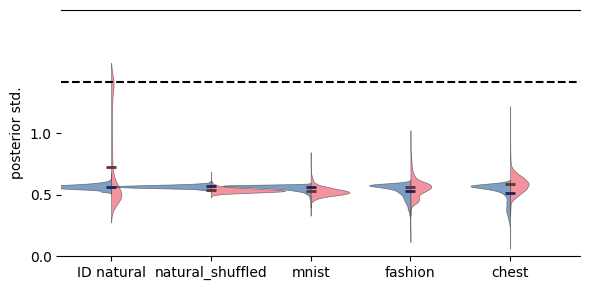

In [20]:
plt.figure(figsize=(6,3))
ax=sns.violinplot(data=uncertainty_df, x="dataset", y="uncertainty", hue="model",
                  split=True, inner=None,linewidth=.5,palette=cmap_bright_vae_eavae,saturation=1.,gridsize=4000,
                  density_norm='area',common_norm=True,width=2)

plt.setp(ax.collections, alpha=.7)
plt.axhline(1.4142,color='black',ls='--',label=r'prior')
sns.pointplot(data=uncertainty_df, x="dataset", y="uncertainty", hue="model",
              linestyles = '',markers='_',palette=cmap_dark_vae_eavae,errwidth=0.0)
plt.xlim(-.5,4.7)
plt.xticks([0,1,2,3,4],['','','','',''])
plt.xticks([0,1,2,3,4],['ID natural','natural_shuffled', 'mnist','fashion','chest'])
plt.yticks([0,0.5,1])
plt.ylim(0,2)

plt.ylabel('posterior std.')
plt.xlabel('')
plt.legend('',frameon=False)
plt.gca().spines[['right', 'left']].set_visible(False)
plt.tight_layout()

aux.save_fig(config['savedir']+"ood_uncertainty")

In [21]:
natural_s_post_sample = aux.load(config['eavae_prefix'], 'posterior_sample')[:60000, -1]
mnist_s_post_sample = aux.load(config['eavae_prefix'], 'posterior_sample_mnist')[:60000, -1]
fashion_s_post_sample = aux.load(config['eavae_prefix'], 'posterior_sample_fashion')[:60000, -1]
chest_s_post_sample = aux.load(config['eavae_prefix'], 'posterior_sample_chest')[:60000, -1]


File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample_mnist.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample_fashion.pt
File loaded from ../eval_data/EAVAE_softlaplace/EAVAE_softlaplace_posterior_sample_chest.pt


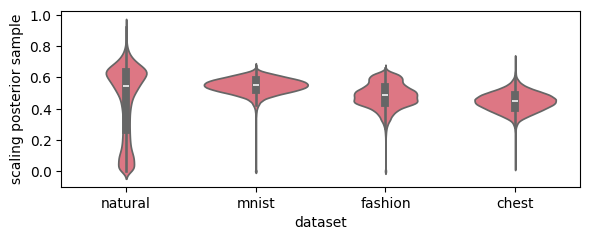

In [22]:
import pandas as pd
a=2
# Combine uncertainties into one list and repeat dataset names accordingly
data = {
    'dataset': (['natural'] * len(natural_s_post_sample) +
                ['mnist'] * len(mnist_s_post_sample) +
                ['fashion'] * len(fashion_s_post_sample) +
                ['chest'] * len(chest_s_post_sample)),
    'scaling posterior sample': torch.cat([natural_s_post_sample,
                              mnist_s_post_sample,
                              fashion_s_post_sample,
                              chest_s_post_sample]).cpu().numpy()
}

uncertainty_df = pd.DataFrame(data)

plt.figure(figsize=(6, 2.5))
ax = sns.violinplot(x='dataset', y='scaling posterior sample', data=uncertainty_df, color=color_eavae)

plt.tight_layout()

aux.save_fig(config['savedir']+"ood_scaling")

plt.show()
